<a href="https://colab.research.google.com/github/onslaught7/Customer_Churn_Prediction/blob/main/Customer_Churn_Pred_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

Customer churn is a problem or challenge that many telecom companies face. It refers to a customer leaving a telecom provider for another.  

**Why churn occurs?**

Churn can occur for several reasons such as:


*   Poor service quality
*   Poor customer support

*   Lack of new features

*   Pricing of services
*   Better deals elsewhere


*   Target customer demographics







## **Project Objective**

The main project objective is to dive deep into the Telco-customer-churn dataset and **analyse** the reasons behind churn or the leaving of customers along with clear **visualisation**.

After I am satsified with the analysis, implement **Machine Learning** techniques namely **Artificial Neural Networks (ANN)**, **Extreme Gradient Boosting (XGBoost)**, **Recurrent Neural Network (RNN)** and **Long short-term memory (LSTM)** to predict future churn i.e. predict who might cancel their future service from the provider.

## **Load Dataset from Web**

The dataset consists of:


*   Customer Demographics: gender, senior citizen, partner, dependents

*   Services used by the customer: Phone Service, Internet Service, Online Security Sevice, Device Protection, whether customer uses Multiple Lines, Tech Support, Streaming Service
*   Account Details: Payment and Billing details, contract tenure etc

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# checking the data types of values stored in the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Customer ID will play no role towards getting a relation between data and churn so we are better of cleaning the column of customerID in the dataset

We will also perform one-hot-encoding, i.e. converting the categorical variables into dummy variables. Some of the reasons for doing so are:


*   Converting them to dummy variables allows numerical representation without implying any specific ranking or order.

*   By representing categorical variables as dummy variables, we provide more fine-grained information to the model. This can lead to better model performance, as the model can learn different effects associated with each category independently.



In [ ]:
# Dropping customerID
df = df.drop('customerID', axis=1)

In [ ]:
# Converting total charges which is initially of object type to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Performing one-hot-encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

In [ ]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## **Data Visualisation**

We can plot a correlation matrix to have an understanding how the features are correlated to churn. This can help us have a quick insight of what might be affectiong the phenomenon of customers leaving the company

In [ ]:
# Calculating the correlation matrix
corr_matrix = df_encoded.corr()

# With respect to the column 'Churn_Yes'
corr_with_churn = corr_matrix['Churn_Yes'].sort_values()

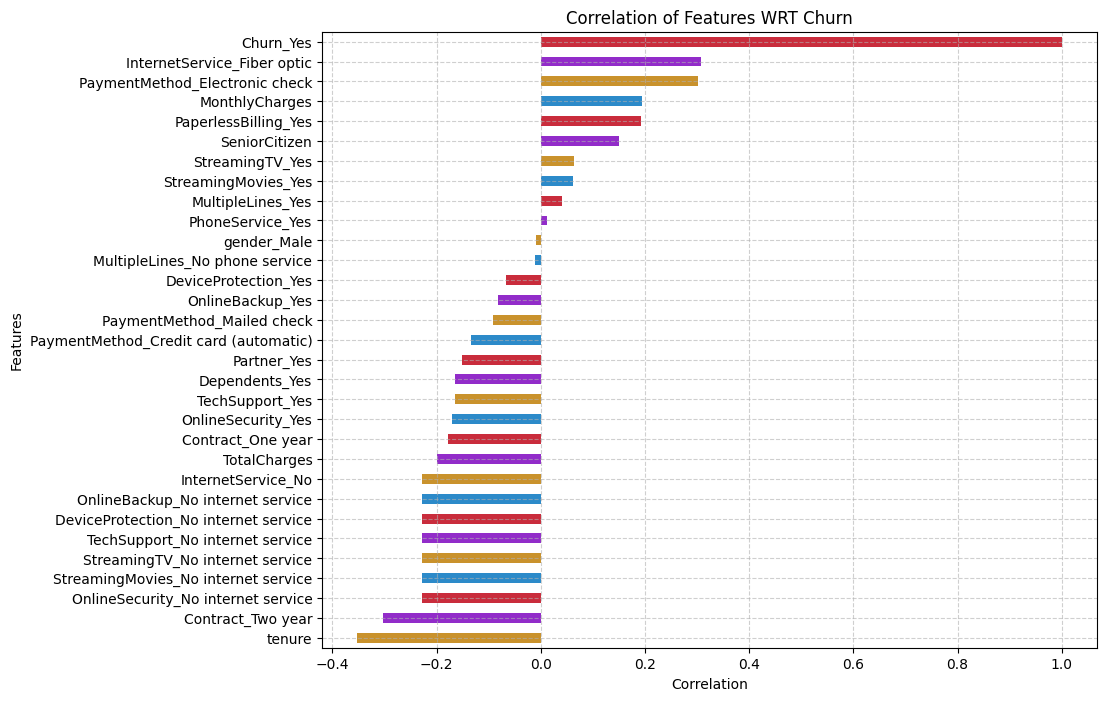

In [ ]:
import matplotlib.pyplot as plt

color_palette = ['#c9922c', '#922cc9', '#c92c3c', '#2c8ac9']

# Plottiing the correlation
plt.figure(figsize=(10, 8))
corr_with_churn.plot(kind='barh', color = color_palette)
plt.title('Correlation of Features WRT Churn')
plt.ylabel('Features')
plt.xlabel('Correlation')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

It can be deduced from the above correlation that:


*   Customers availing Fibre Optic Internet service and customers using electronic checks as payment methods have higher correlation with churn and are more likely to cancel their service from the company

*   Customers with contracts of two years are less likely to leave or churn.
*   Customers receiving additional services like online backup, tech support, device protection, TV and movies streaming and online security are less likely to churn.


*   Among customer demographics age plays a crucial role as senior citizens are more likely to churn

The three numerical columns namely tenure, monthly charges and total charges have significant correlation with churn so we can have a visual representation of distribution of these features by churn.


*   For distribution of data with median, qartiles and potential outliers in boxplot representation
*   For frequency distributuion of data using histograms



<ipython-input-12-49ad27090fea>:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x='Churn_Yes', y=col, data=df_encoded, ax=axes[i], hue='Churn_Yes', palette=color_palette, legend=False)
<ipython-input-12-49ad27090fea>:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x='Churn_Yes', y=col, data=df_encoded, ax=axes[i], hue='Churn_Yes', palette=color_palette, legend=False)
<ipython-input-12-49ad27090fea>:12: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(x='Churn_Yes', y=col, data=df_encoded, ax=axes[i], hue='Churn_Yes', palette=color_palette, legend=False)


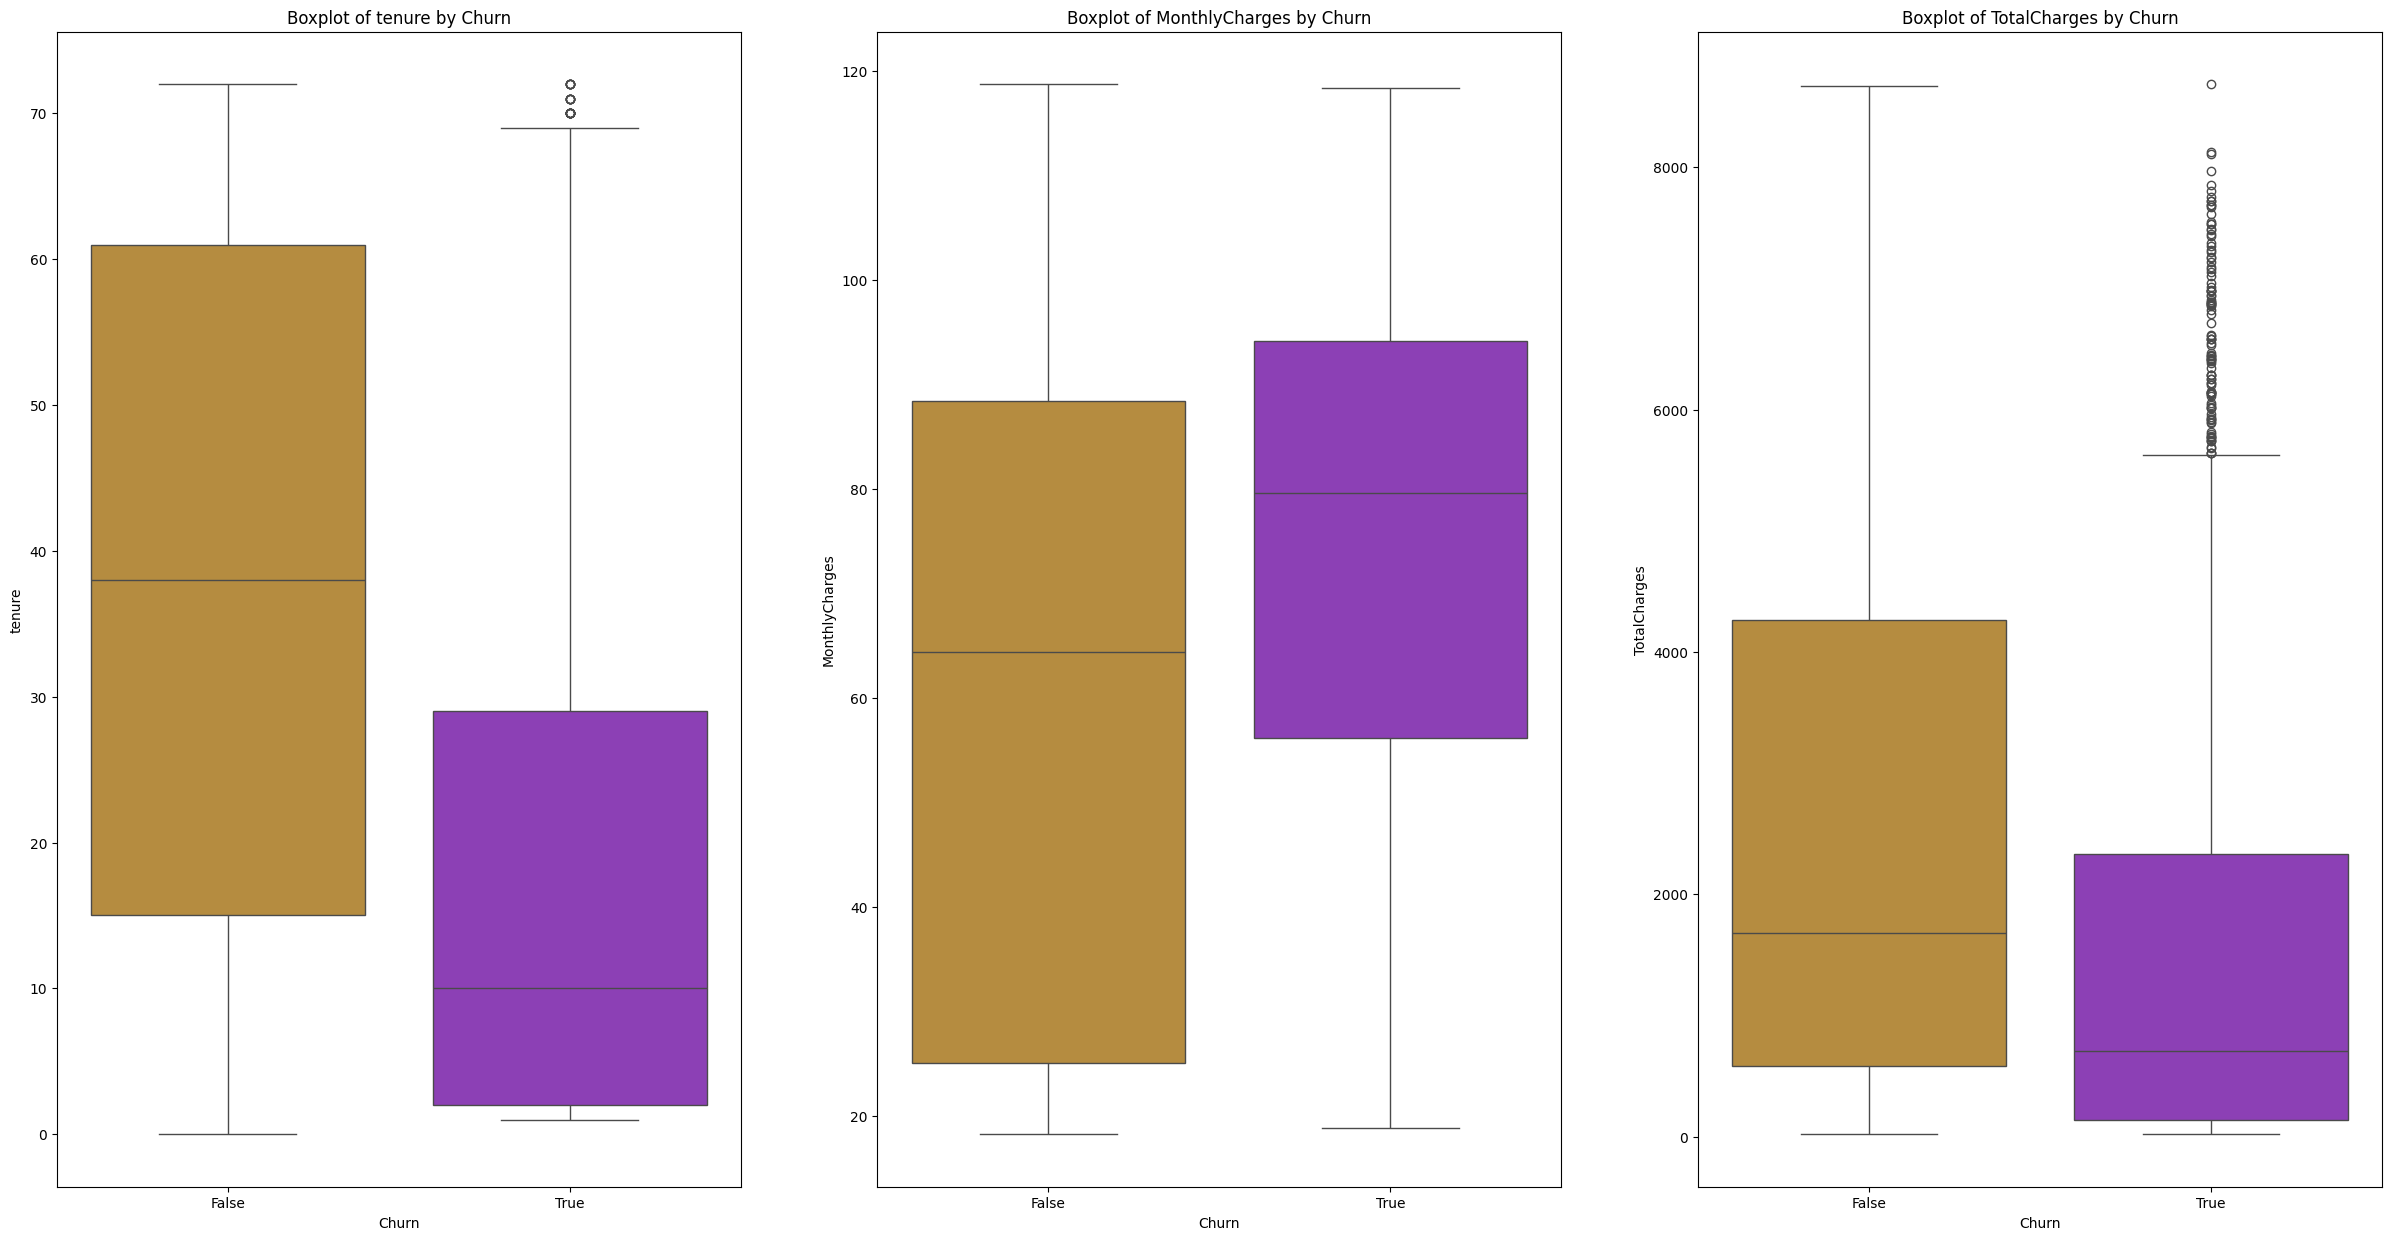

In [ ]:
import seaborn as sns

# Defining the number of rows and column for our subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

# Define colors for above and below the median line
color_above_median = 'skyblue'  # Color for values above the median
color_below_median = 'salmon'   # Color for values below the median


for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.boxplot(x='Churn_Yes', y=col, data=df_encoded, ax=axes[i], hue='Churn_Yes', palette=color_palette, legend=False)
    axes[i].set_title(f'Boxplot of {col} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.show()


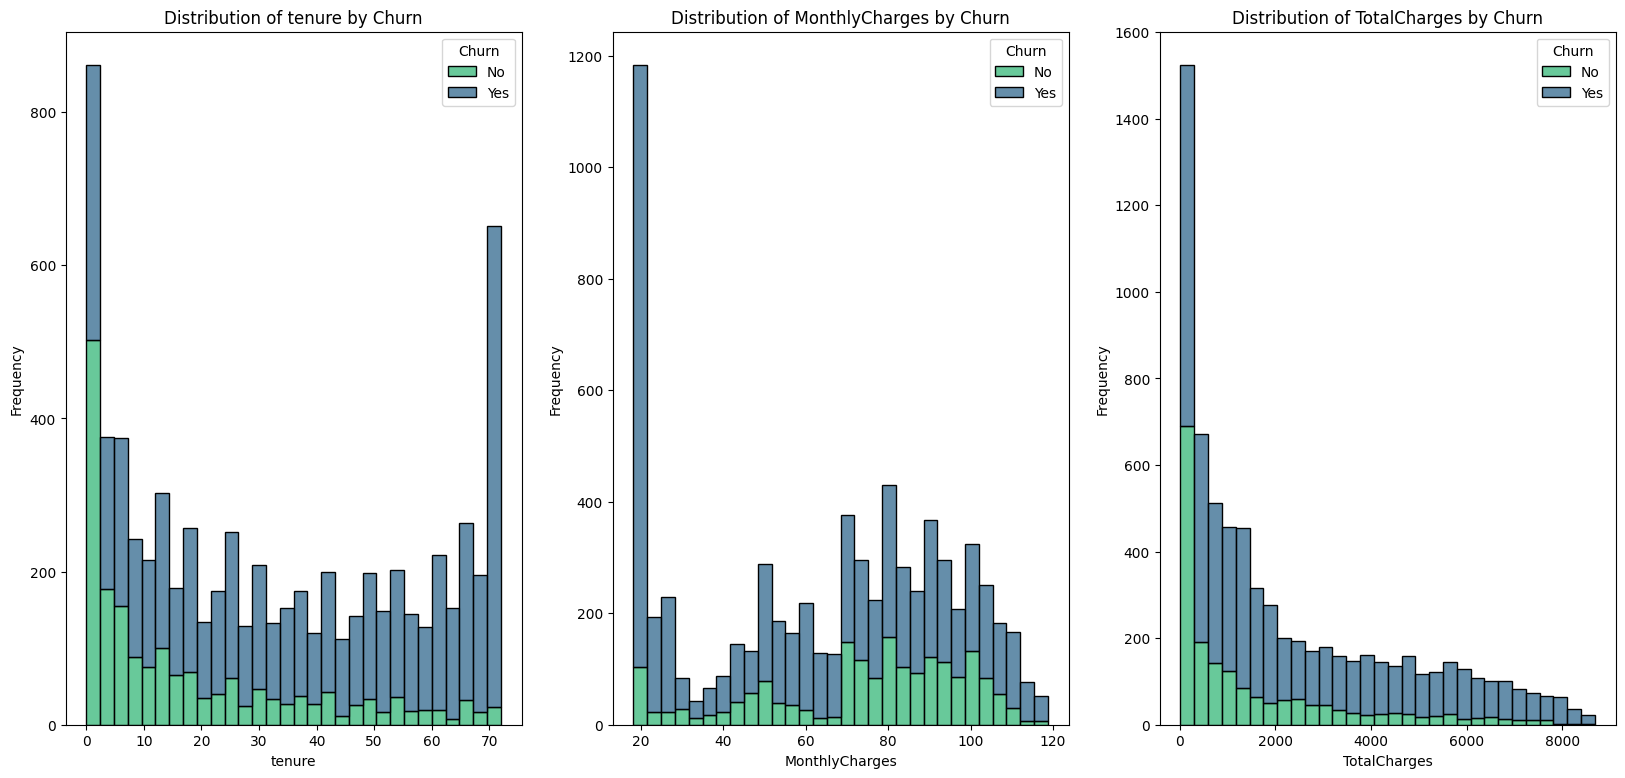

In [ ]:
# define NO of plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 9))

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=df_encoded, x=col, hue='Churn_Yes', multiple='stack', bins=30, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

plt.show()

We can Deduce from above that the most impactful features for Churn are:


*   Tenure

*   Total Charges
*   Internet Service


*   Payment Method


*   Monthly Charges




## **Prediction**

### **Data Preprocessing**

Before we move further into applying Machine Learning algorithms for predictions and calculating accuracy we need to deal with the NaN values. We can either drop rows with a single feature having NaN values or perform imputation.

**Imputation** involves filling in missing values with estimated values based on the non-missing values in the dataset such as filling the missing cells with mean or median of the rest of the values under the same feature variable or filling it with the most frequently occuring value under the feature i.e. mode.


In [ ]:
df_en = pd.get_dummies(df, drop_first=True)

In [ ]:
df_en.isnull().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [ ]:
# Show all the rows with atleast one feature variable having an NaN value or empty cell value
df_en[df_en.isnull().any(axis=1)]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
488,0,0,52.55,NaN,False,True,True,False,True,False,...,True,False,False,False,True,True,False,False,False,False
753,0,0,20.25,NaN,True,False,True,True,False,False,...,False,True,False,False,True,False,False,False,True,False
936,0,0,80.85,NaN,False,True,True,True,False,False,...,True,False,True,False,True,False,False,False,True,False
1082,0,0,25.75,NaN,True,True,True,True,False,True,...,False,True,False,False,True,False,False,False,True,False
1340,0,0,56.05,NaN,False,True,True,False,True,False,...,True,False,False,False,True,False,True,False,False,False
3331,0,0,19.85,NaN,True,True,True,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3826,0,0,25.35,NaN,True,True,True,True,False,True,...,False,True,False,False,True,False,False,False,True,False
4380,0,0,20.00,NaN,False,True,True,True,False,False,...,False,True,False,False,True,False,False,False,True,False
5218,0,0,19.70,NaN,True,True,True,True,False,False,...,False,True,False,True,False,True,False,False,True,False
6670,0,0,73.35,NaN,False,True,True,True,False,True,...,True,False,False,False,True,False,False,False,True,False


In [ ]:
df['TotalCharges'].max(), df['TotalCharges'].min()

(8684.8, 18.8)

We will use the median strategy of imputation since it can be seen the range of the values under Total Charges is really high and can cause discrepancy in the mean of values.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer


# Split the dataset
X = df_en.iloc[:,:-1]
Y = df_en.iloc[:,-1].values

# Impute missing values
imputer = SimpleImputer(strategy='median')  # Choose appropriate strategy
X_imputed = imputer.fit_transform(X)

### **Extreme Gradient Boosting (XGBoost)**

The XGBoost is good at handling imbalanced data.

Our dataset has a problem where some categories have far fewer examples than others. This can make it difficult for our model to learn effectively. To fix this, we use a technique called SMOTE.
**SMOTE** is used to create new, realistic examples for the smaller categories. This balances out the dataset and helps the model learn better.



1.   Then We split the dataset into training and testing where 20% of our complete data set will be used for testing and the other 80% for training the model.

1. Declare a dictionary to define the grid hypermaters that will be searched during hypermater optimization.

2. Perform Grid Search with cross-validation for hyperparameter optimization using randomized search and cross validation.







In [ ]:
# Handle class imbalance using SMOTE oversampling technique
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_imputed, Y)

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

#  XGBoost classifier
xgb = XGBClassifier(verbosity=1)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}



# Perform grid search with cross-validation
grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, cv=5, scoring='roc_auc', n_jobs=1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

final_xgb = XGBClassifier(**best_params)
final_xgb.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_xgb.predict(X_test)

In [ ]:
# Evaluate the model
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score:", roc_auc*100, "%")

ROC-AUC Score: 86.7778556883147 %


### **Artificial Neural Networks (ANN)**






I will define a neural network model using a popular deep learning model Keras. The keras model has three parts:

1.   Input Layer: It is the first layer of the neural network. It consists of neurons corresponding to the features or dimensions of the input data, where the number of neurons in input data is determined by the dimensionality of input data.

1.   Hidden Layer: These are the layers between the input and the output layers where the actual computation and transformation of data takes place. These layers apply nonlinear transformations to the input data allowing the network to learn commplex patterns and representations from the data.

2.   Output Layer: This is the layer where the model produces its predictions or outputs. The number of neurons and the activation function in the output layer is actually dependent on the type of problem being solved.

Then hyperparameter tuning is performed where different combinations of hypermaters are tested to find the best fit set.

I have tuned the number of neurons, activation, optimizer and learning_rate which are defined in a dictionary.



In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.base import BaseEstimator

In [ ]:
# Split the data set into feature set and target
X = df_en.iloc[:, :-1]
Y = df_en.iloc[:, -1]

# Impute missing values
imputer = SimpleImputer(strategy='median')  # Choose appropriate strategy
X_imputed = imputer.fit_transform(X)

# Handle class imbalance using SMOTE oversampling technique
smote = SMOTE(random_state=42)
X_resampled_1, Y_resampled_1 = smote.fit_resample(X_imputed, Y)

# Splitting the resampled data
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_1, Y_resampled_1, test_size=0.2, random_state=42)

# Creating the keras model
def create_model(neurons = 16, activation='relu', optimizer='adam', learning_rate=0.01):
  model = Sequential()
  model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


# a wrapper class around the Keras model to make it compatible with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Create an instance of the wrapper class
keras_wrapper = KerasClassifierWrapper(create_model)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=1)
grid_result = grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

# Train the final model with the best hyperparameters
final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = final_model.predict(X_test)

65/65 [==============================] - 0s 1ms/step


In [ ]:
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for ANN Model:", roc_auc*100, "%")

ROC-AUC Score for ANN Model: 86.11554869195885 %


### **Recurrent Neural Networks (RNN)**



In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.base import BaseEstimator
from tensorflow.keras.layers import SimpleRNN

In [ ]:
X = df_en.iloc[:, :-1].values
Y = df_en.iloc[:, -1].values.reshape(-1, 1)

# Impute missing values
imputer = SimpleImputer(strategy='median')  # Choose appropriate strategy
X_imputed = imputer.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_imputed, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Normalize the input data
X_train_norm = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_test_norm = (X_test - np.min(X_test, axis=0)) / (np.max(X_test, axis=0) - np.min(X_test, axis=0))

# Reshape the input data for RNN
X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the function to create the Keras model
def create_model(neurons=16, activation='relu', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(SimpleRNN(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define a wrapper class around the Keras model to make it compatible with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, create_model, **kwargs):
        self.create_model = create_model
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model = self.create_model(**self.kwargs)
        self.model.fit(X, y, epochs=20, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Create an instance of the wrapper class
keras_wrapper = KerasClassifierWrapper(create_model)

# Define the grid of hyperparameters to search
param_grid = {
    'neurons': [8, 16, 32],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=keras_wrapper, param_grid=param_grid, scoring=make_scorer(roc_auc_score), cv=5, n_jobs=1)
grid_result = grid_search.fit(X_train_norm, Y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_

# Train the final model with the best hyperparameters
final_model = KerasClassifierWrapper(create_model, **best_params)
final_model.fit(X_train_norm, Y_train)

# Make predictions on the test set
Y_pred = final_model.predict(X_test_norm)

65/65 [==============================] - 0s 3ms/step


In [ ]:
roc_auc = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC Score for RNN Model:", roc_auc*100, "%")

ROC-AUC Score for RNN Model: 89.4630304128086 %


### **Long Short Term Memory (LSTM)**

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
# Ensure TensorFlow is running on GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0
Default GPU Device: /device:GPU:0


In [ ]:
X = df_en.iloc[:, :-1].values
Y = df_en.iloc[:, -1].values.reshape(-1, 1)

# Impute missing values
imputer = SimpleImputer(strategy='median')  # Choose appropriate strategy
X_imputed = imputer.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_imputed, Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Normalize input data
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)
X_train_norm = (X_train - min_val) / (max_val - min_val)
X_test_norm = (X_test - min_val) / (max_val - min_val)

# Reshape data for RNN
X_train_norm = X_train_norm.reshape((X_train_norm.shape[0], X_train_norm.shape[1], 1))
X_test_norm = X_test_norm.reshape((X_test_norm.shape[0], X_test_norm.shape[1], 1))

# Define the Keras model
def create_model(neurons=50, dropout_rate=0.2, activation='relu', optimizer='adam', learn_rate=0.01):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X_train_norm.shape[1], 1), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learn_rate), metrics=['accuracy'])
    return model

# Wrapper class for Keras model to use with GridSearchCV
class KerasClassifierWrapper(BaseEstimator):
    def __init__(self, neurons, dropout_rate, activation, optimizer, learn_rate):
        self.neurons = neurons
        self.dropout_rate = dropout_rate
        self.activation = activation
        self.optimizer = optimizer
        self.learn_rate = learn_rate

    def fit(self, X, y, **fit_params):
        self.model = create_model(self.neurons, self.dropout_rate, self.activation, self.optimizer, self.learn_rate)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Setup for GridSearchCV
param_grid = {
    'neurons': [50, 100],
    'dropout_rate': [0.1, 0.2, 0.3],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'learn_rate': [0.001, 0.01]
}
grid_search = GridSearchCV(estimator=KerasClassifierWrapper(50, 0.1, 'relu', 'adam', 0.01), param_grid=param_grid,
                           scoring=make_scorer(roc_auc_score), cv=3, n_jobs=1)
grid_result = grid_search.fit(X_train_norm, Y_train, epochs=10, batch_size=10, verbose=0, callbacks=[EarlyStopping(monitor='loss', patience=3)])

# Get the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train the final model
final_model = create_model(**grid_result.best_params_)
final_model.fit(X_train_norm, Y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the model
Y_pred = final_model.predict(X_test_norm)

87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 9ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 10ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 8ms/step


87/87 [==============================] - 1s 8ms/step


87/87 [==============================] - 1s 10ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 12ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 9ms/step


87/87 [==============================] - 1s 14ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 9ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 8ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 10ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 8ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 6ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 7ms/step


87/87 [==============================] - 1s 8ms/step
